In [13]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


#티스토리 업로드시 최적화 코드
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:90% !important;}</style>"))

# 2023.04.06
# EDA
Dataset Info.

    train.csv [파일]
    1,000,000개의 데이터
    ID : 샘플 고유 id
    항공편 운항 관련 정보
    Delay: 항공편 지연 여부 (Not_Delayed, Delayed)
    예측해야 하는 타깃
    다수의 데이터에 레이블이 존재하지 않음
    준지도학습을 통해 레이블링 가능


    test.csv [파일]
    1,000,000개의 데이터
    ID : 샘플 고유 id
    항공편 운항 관련 정보

    Estimated_Departure_Time: 예상 출발 시간
    Estimated_Arrival_Time : 예상 도착 시간
    Carrier_Code(IATA) : 위치 식별 코드 (공항코드)
    Carrier_ID(DOT) : 몰?루
    Tail_Number : 항공기 특수 번호 (맨앞자리 영어가 원산지)
    Carrier : 항공회사 


In [14]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
file_dir = '/content/drive/MyDrive/데이콘/데이콘 항공편 지연/데이콘_항공편_지연'

In [16]:
import numpy as np
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [17]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [18]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [19]:
csv_to_parquet(file_dir + '/train.csv', 'train')
csv_to_parquet(file_dir + '/test.csv', 'test')

train Done.
test Done.


In [20]:
train = pd.read_parquet('/content/train.parquet')
test = pd.read_parquet('/content/test.parquet')
sample_submission = pd.read_csv(file_dir+'/sample_submission.csv', index_col = 0)

In [21]:
train.head(10)

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,None
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,None,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,Not_Delayed
7,TRAIN_000007,4,20,1815.0,1955.0,0,0,ORD,13930,Illinois,MCI,13198,Missouri,403.0,None,UA,20304.0,N110SY,None
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,None,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,Not_Delayed
9,TRAIN_000009,6,6,650.0,838.0,0,0,LIT,12992,Arkansas,IAH,12266,Texas,374.0,ExpressJet Airlines Inc.,UA,20366.0,N14902,None


                          결손값 개수  결손값_ratio
Estimated_Arrival_Time    109048   0.109048
Carrier_ID(DOT)           109006   0.109006
Carrier_Code(IATA)        108993   0.108993
Estimated_Departure_Time  108984   0.108984
Airline                   106527   0.106527
Destination_State         106523   0.106523
Origin_State              106505   0.106505
Destination_Airport            0   0.000000
Distance                       0   0.000000
Destination_Airport_ID         0   0.000000
ID                             0   0.000000
Month                          0   0.000000
Origin_Airport_ID              0   0.000000
Origin_Airport                 0   0.000000
Diverted                       0   0.000000
Cancelled                      0   0.000000
Day_of_Month                   0   0.000000
Tail_Number                    0   0.000000
                          결손값 개수  결손값_ratio
Delay                     744999   0.744999
Destination_State         109079   0.109079
Estimated_Arrival_Time    109040

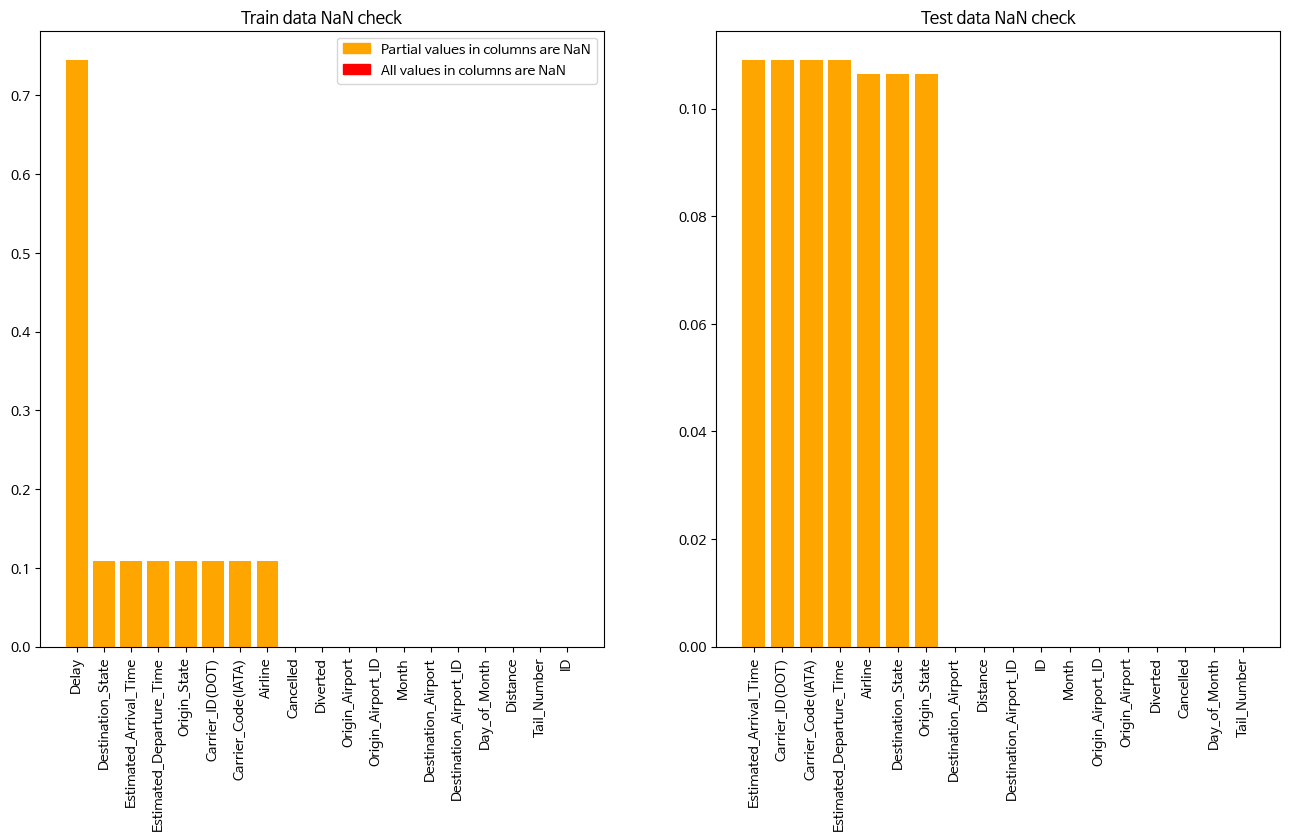

In [22]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

column = ['결손값 개수']
axis_1 = pd.DataFrame(data = train.isnull().sum(axis=1), columns = column)
axis_1 = axis_1.sort_values(by = '결손값 개수', ascending = False)

train.isnull().sum(axis=0)
train_row_NaN = pd.DataFrame(train.isnull().sum(axis=0), columns = column)
train_row_NaN = train_row_NaN.sort_values(by = '결손값 개수', ascending = False)
train_row_su = train.shape[0]
train_row_NaN['결손값_ratio'] = train_row_NaN['결손값 개수']/train_row_su

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (16,8))
x = np.arange(len(train_row_NaN.index))
plt.subplot(1, 2, 1)
plt.xticks(x, train_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])

def color(data):
    if data == 1:
        return 'red'
    else:
        return 'orange'
plt.bar(x, train_row_NaN['결손값_ratio'], color = [color(i) for i in train_row_NaN['결손값_ratio']])
plt.title('Train data NaN check')

test.isnull().sum(axis=0)
test_row_NaN = pd.DataFrame(test.isnull().sum(axis=0), columns = column)
test_row_NaN = test_row_NaN.sort_values(by = '결손값 개수', ascending = False)
test_row_su = test.shape[0]
test_row_NaN['결손값_ratio'] = test_row_NaN['결손값 개수']/test_row_su

plt.subplot(1, 2, 2)
x2 = np.arange(len(test_row_NaN.index))
plt.xticks(x2, test_row_NaN.index)
plt.xticks(rotation=90)
plt.bar(x2, test_row_NaN['결손값_ratio'], color = [color(i) for i in test_row_NaN['결손값_ratio']])
plt.title('Test data NaN check')

print(test_row_NaN)
print(train_row_NaN)
plt.show()

Delay (key)값의 누락은 정확한 예측이 불가능하므로, 해당 Delay의 null을 최대한 채울 수 있으면 좋다.

해당 작업을 하기 전에, 출발 도시와 도착 도시의 null을 분석하여 채워넣는다.
또한 예상 출발, 도착 시간은 항공사/비행기 마다 다르므로, 값을 어떻게 대체할 지 고민이 필요하다.

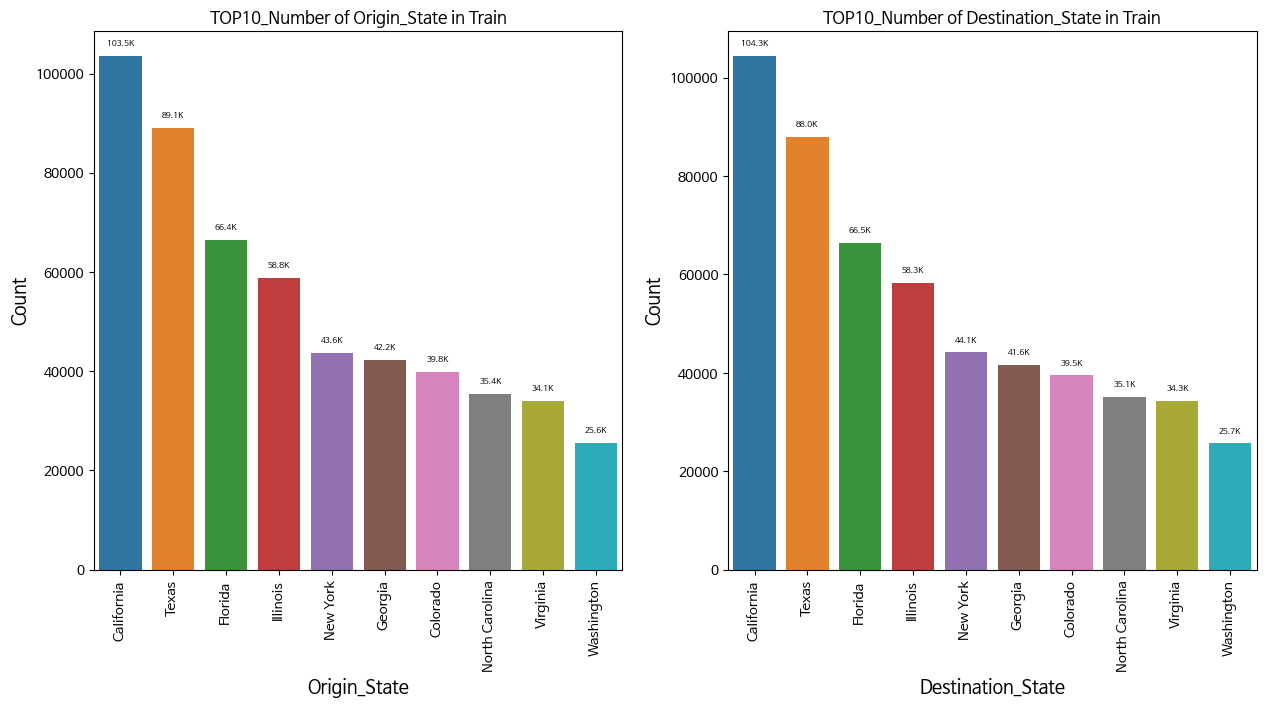

In [23]:
def km_gb(value):
    if value < 1e6:
        return format((value/1e3), '.01f')+"K"
    else:
        return format((value/1e6), '.01f')+"M"

import seaborn as sns

# Origin_State, Destination_State 개수 
train_origin = train.groupby("Origin_State").size()

train_origin = train_origin.reset_index()
train_origin.columns = ["state", "count"]
train_origin = train_origin.sort_values(by = "count", ascending = False)
train_origin['rank'] = train_origin['count'].rank(ascending=False) 
train_origin = train_origin[train_origin['rank']<= 10]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
splot=sns.barplot(x="state",y="count",data = train_origin)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Origin_State", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Origin_State in Train')

train_destrination = train.groupby("Destination_State").size()
train_destrination = train_destrination.reset_index()
train_destrination.columns = ["state", "count"]
train_destrination = train_destrination.sort_values(by = "count", ascending = False)
train_destrination['rank'] = train_destrination['count'].rank(ascending=False) 
train_destrination = train_destrination[train_destrination['rank']<= 10]

plt.subplot(1, 2, 2)
splot=sns.barplot(x="state",y="count",data=train_destrination)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Destination_State", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Destination_State in Train')

plt.show()

In [24]:
not_dly_train = train[train.Delay == 'Not_Delayed']
dly_train = train[train.Delay == 'Delayed']
non_train = train[~(train.Delay == 'Delayed')&~(train.Delay == 'Not_Delayed')]

In [25]:
#list = []
#for i in range(3):
#    list.append(eval('node_list{:}'.format(i+1)))

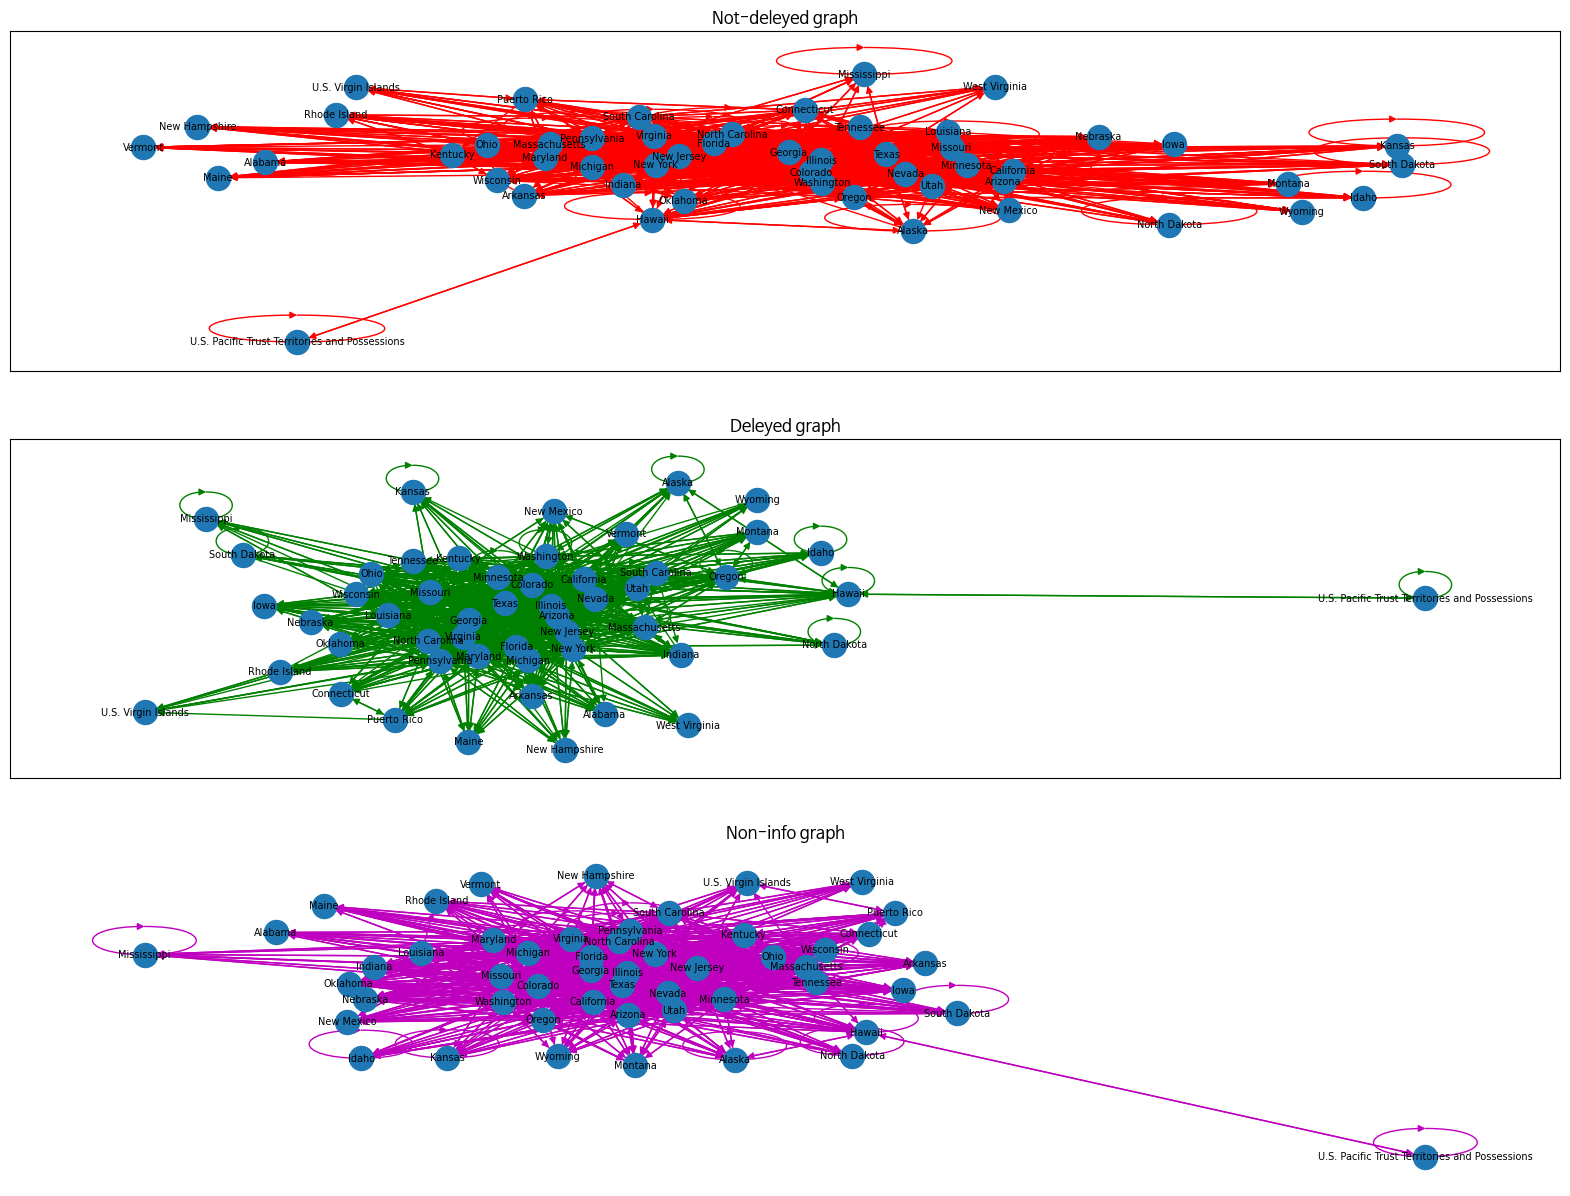

In [26]:
# 항공편 이동 노드화

import networkx as nx
import matplotlib.pyplot as plt

# 노드와 엣지 리스트 정의
node_list1 = []
edge_list1 = []
node_list2 = []
edge_list2 = []
node_list3 = []
edge_list3 = []

f, axs = plt.subplots(3,1,figsize=(20,15))

# Origin_State와 Destination_State 페어 리스트
pairs1 = [(i,j) for i,j in zip(not_dly_train['Origin_State'], not_dly_train['Destination_State']) if (i != None and j != None)] # 딜레이 되지 않음
pairs2 = [(i,j) for i,j in zip(dly_train['Origin_State'], dly_train['Destination_State']) if (i != None and j != None)] # 딜레이 됨
pairs3 = [(i,j) for i,j in zip(non_train['Origin_State'], non_train['Destination_State']) if (i != None and j != None)] # 딜레이 정보 없음

# 노드와 엣지 리스트에 페어 추가
for pair in pairs1:
    origin, destination = pair
    node_list1 += [origin, destination]
    edge_list1.append(pair)

# 노드 중복 제거
node_list1 = set(node_list1)

# 노드와 엣지로 그래프 생성
G = nx.DiGraph()
G.add_nodes_from(node_list1)
G.add_edges_from(edge_list1)

# 그래프 시각화
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300, ax=axs[0])
nx.draw_networkx_labels(G, pos, font_size=7, ax=axs[0])
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True, ax=axs[0])


for pair in pairs2:
    origin, destination = pair
    node_list2 += [origin, destination]
    edge_list2.append(pair)

# 노드 중복 제거
node_list2 = set(node_list2)

# 노드와 엣지로 그래프 생성
L = nx.DiGraph()
L.add_nodes_from(node_list2)
L.add_edges_from(edge_list2)

# 그래프 시각화
pos = nx.spring_layout(L)
nx.draw_networkx_nodes(L, pos, node_size=300, ax=axs[1])
nx.draw_networkx_labels(L, pos, font_size=7, ax=axs[1])
nx.draw_networkx_edges(L, pos, edge_color='g', arrows=True, ax=axs[1])

for pair in pairs3:
    origin, destination = pair
    node_list3 += [origin, destination]
    edge_list3.append(pair)

# 노드 중복 제거
node_list3 = set(node_list3)

# 노드와 엣지로 그래프 생성
H = nx.DiGraph()
H.add_nodes_from(node_list3)
H.add_edges_from(edge_list3)

# 그래프 시각화
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size=300, ax=axs[2])
nx.draw_networkx_labels(H, pos, font_size=7, ax=axs[2])
nx.draw_networkx_edges(H, pos, edge_color='m', arrows=True, ax=axs[2])

axs[0].set_title('Not-deleyed graph')
axs[1].set_title('Deleyed graph')
axs[2].set_title('Non-info graph')

plt.axis('off')
plt.show()

출발 도시와 도착 도시가 null인 노드를 제외한 페어를 노드화하여 도식화함.

>> 출발과 도착의 도시가 같은 경우가 존재함. 꼭 다른 도시로 이동한다는 보장 X
>> 그리고 출발 비행기와 도착 비행기가 다르다 이건 환승을 의미하는 것인가? 아니면 왕복을 말하는 것인가?

>>> 그냥 같은 주의 공항에서 다른 공항으로 이동하는 것 같음.

재밌는 사실은 해당 데이터에서 

* Estimated_Departure_Time
* Estimated_Arrival_Time

은 겉보기에 분으로 계산된 것 같지만, 실제로 HHMM의 형태를 이루고 있다. 

In [27]:
print(train[(train['Estimated_Departure_Time']<0) & (train['Estimated_Departure_Time']>2400)])
print(train[(train['Estimated_Arrival_Time']<0) & (train['Estimated_Arrival_Time']>2400)])

Empty DataFrame
Columns: [ID, Month, Day_of_Month, Estimated_Departure_Time, Estimated_Arrival_Time, Cancelled, Diverted, Origin_Airport, Origin_Airport_ID, Origin_State, Destination_Airport, Destination_Airport_ID, Destination_State, Distance, Airline, Carrier_Code(IATA), Carrier_ID(DOT), Tail_Number, Delay]
Index: []
Empty DataFrame
Columns: [ID, Month, Day_of_Month, Estimated_Departure_Time, Estimated_Arrival_Time, Cancelled, Diverted, Origin_Airport, Origin_Airport_ID, Origin_State, Destination_Airport, Destination_Airport_ID, Destination_State, Distance, Airline, Carrier_Code(IATA), Carrier_ID(DOT), Tail_Number, Delay]
Index: []


따라서 시간을 만들기 전에 해당 데이터를 시간화해주는 작업과 예상 비행시간을 만들어줘야한다.

In [28]:
import datetime
def to_time(time_list):
    Time = pd.Series(time_list).astype(str).str.zfill(4)
    Time = Time.replace('2400','0000')
    return [datetime.datetime.strptime(i, '%H%M').strftime("%H:%M") if i != '0nan' else np.NaN for i in Time] 

time_list = [i if str(i) == 'nan' else str(int(i))  for i in train['Estimated_Departure_Time'] ]
time_list1 = [i if str(i) == 'nan' else str(int(i))  for i in train['Estimated_Arrival_Time'] ]
train['Estimated_Departure_Time_HH:MM'] = to_time(time_list)
train['Estimated_Arrival_Time_HH:MM'] = to_time(time_list1)
train


,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,...,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None,NaN,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None,07:40,10:24
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None,16:10,18:05
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,None,09:05,17:35
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None,09:00,10:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,None,...,14100,None,678.0,United Air Lines Inc.,UA,19977.0,N477UA,None,09:36,12:43
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,None,...,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,None,09:20,10:28
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,None,...,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,None,08:00,13:40
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,...,10397,None,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,None,16:13,18:24


In [29]:
time = datetime.datetime.strptime('05:30', "%H:%M") - datetime.datetime.strptime('21:30', "%H:%M") + datetime.datetime.strptime('23:59', "%H:%M") + datetime.timedelta(minutes=1)
datetime.timedelta(hours=time.hour,minutes=time.minute ).total_seconds()/60

480.0

In [30]:
# 예상 비행시간 만들기 (분으로 만들기)
train_est_time = []
for i,j in zip(train['Estimated_Arrival_Time_HH:MM'], train['Estimated_Departure_Time_HH:MM']):
    if str(i) != 'nan' and str(j) != 'nan':
        if (datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M")).total_seconds()/60 >= 0:
            train_est_time.append((datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M")).total_seconds()/60)
        else:
            time = datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M") + datetime.datetime.strptime('23:59', "%H:%M") + datetime.timedelta(minutes=1)
            train_est_time.append(datetime.timedelta(hours=time.hour,minutes=time.minute ).total_seconds()/60)
    else:
        train_est_time.append(np.NaN)
 

In [31]:
train['Estimated_Time'] = train_est_time

In [32]:
train[(train['Origin_State'] == 'Oklahoma') & (train['Destination_State'] == 'Texas')][train['Estimated_Departure_Time'] == 1400].sort_values(by = ['Month', 'Day_of_Month', 'Estimated_Departure_Time', 'Tail_Number'])

<ipython-input-32-734350ff2c72>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[(train['Origin_State'] == 'Oklahoma') & (train['Destination_State'] == 'Texas')][train['Estimated_Departure_Time'] == 1400].sort_values(by = ['Month', 'Day_of_Month', 'Estimated_Departure_Time', 'Tail_Number'])


,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time
801918,TRAIN_801918,1,1,1400.0,1540.0,0,0,TUL,15370,Oklahoma,...,Texas,429.0,ExpressJet Airlines Inc.,None,NaN,N14907,None,14:00,15:40,100.0
471401,TRAIN_471401,1,1,1400.0,1505.0,0,0,OKC,13851,Oklahoma,...,Texas,175.0,Mesa Airlines Inc.,None,20378.0,N247LR,None,14:00,15:05,65.0
522032,TRAIN_522032,1,5,1400.0,1540.0,0,0,TUL,15370,Oklahoma,...,Texas,429.0,None,UA,NaN,N13989,None,14:00,15:40,100.0
389640,TRAIN_389640,1,7,1400.0,1530.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,ExpressJet Airlines Inc.,UA,20366.0,N19554,Not_Delayed,14:00,15:30,90.0
330154,TRAIN_330154,1,10,1400.0,1540.0,0,0,TUL,15370,Oklahoma,...,Texas,429.0,ExpressJet Airlines Inc.,UA,20366.0,N13908,None,14:00,15:40,100.0
367165,TRAIN_367165,1,18,1400.0,1530.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,ExpressJet Airlines Inc.,UA,20366.0,N15912,None,14:00,15:30,90.0
355711,TRAIN_355711,1,26,1400.0,1533.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,Republic Airlines,None,20452.0,N859RW,Not_Delayed,14:00,15:33,93.0
621149,TRAIN_621149,1,29,1400.0,1533.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,Republic Airlines,UA,20452.0,N635RW,None,14:00,15:33,93.0
255369,TRAIN_255369,1,31,1400.0,1530.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,ExpressJet Airlines Inc.,UA,20366.0,N14904,None,14:00,15:30,90.0
963737,TRAIN_963737,2,4,1400.0,1533.0,0,0,OKC,13851,Oklahoma,...,Texas,395.0,ExpressJet Airlines Inc.,UA,NaN,N18557,None,14:00,15:33,93.0


Oklahoma에서 Texas로 가능 비행편을 시간순으로 조회한 다음, Tail_Number로 정렬했더니, 같은 비행편이라도 같은 시간에 출발한 비행기가 항공사마다 다른 점을 발견.

>> 항공사마다 시간이 다르고, 함부로 Null값을 대체하면 안될 것 같음. 

<Axes: >

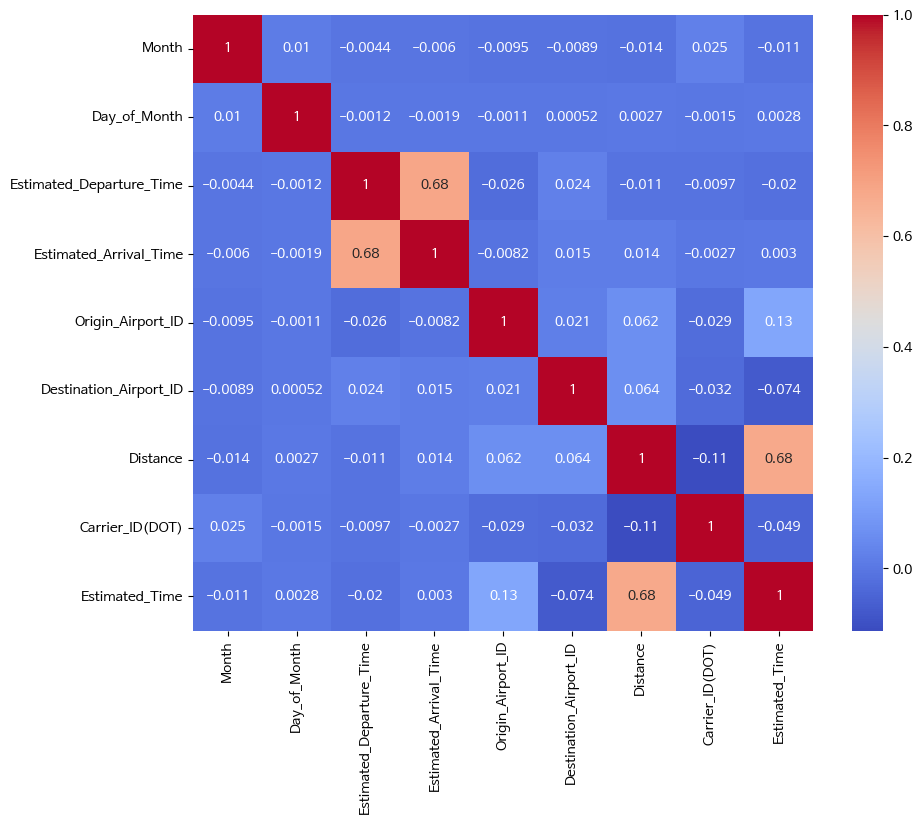

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.copy().drop(labels = ['Cancelled', 'Diverted'], axis = 1).corr()
sns.heatmap(corr,
            cmap='coolwarm',
            annot = True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day_of_Month'}>,
        <Axes: title={'center': 'Estimated_Departure_Time'}>],
       [<Axes: title={'center': 'Estimated_Arrival_Time'}>,
        <Axes: title={'center': 'Origin_Airport_ID'}>,
        <Axes: title={'center': 'Destination_Airport_ID'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Carrier_ID(DOT)'}>,
        <Axes: title={'center': 'Estimated_Time'}>]], dtype=object)

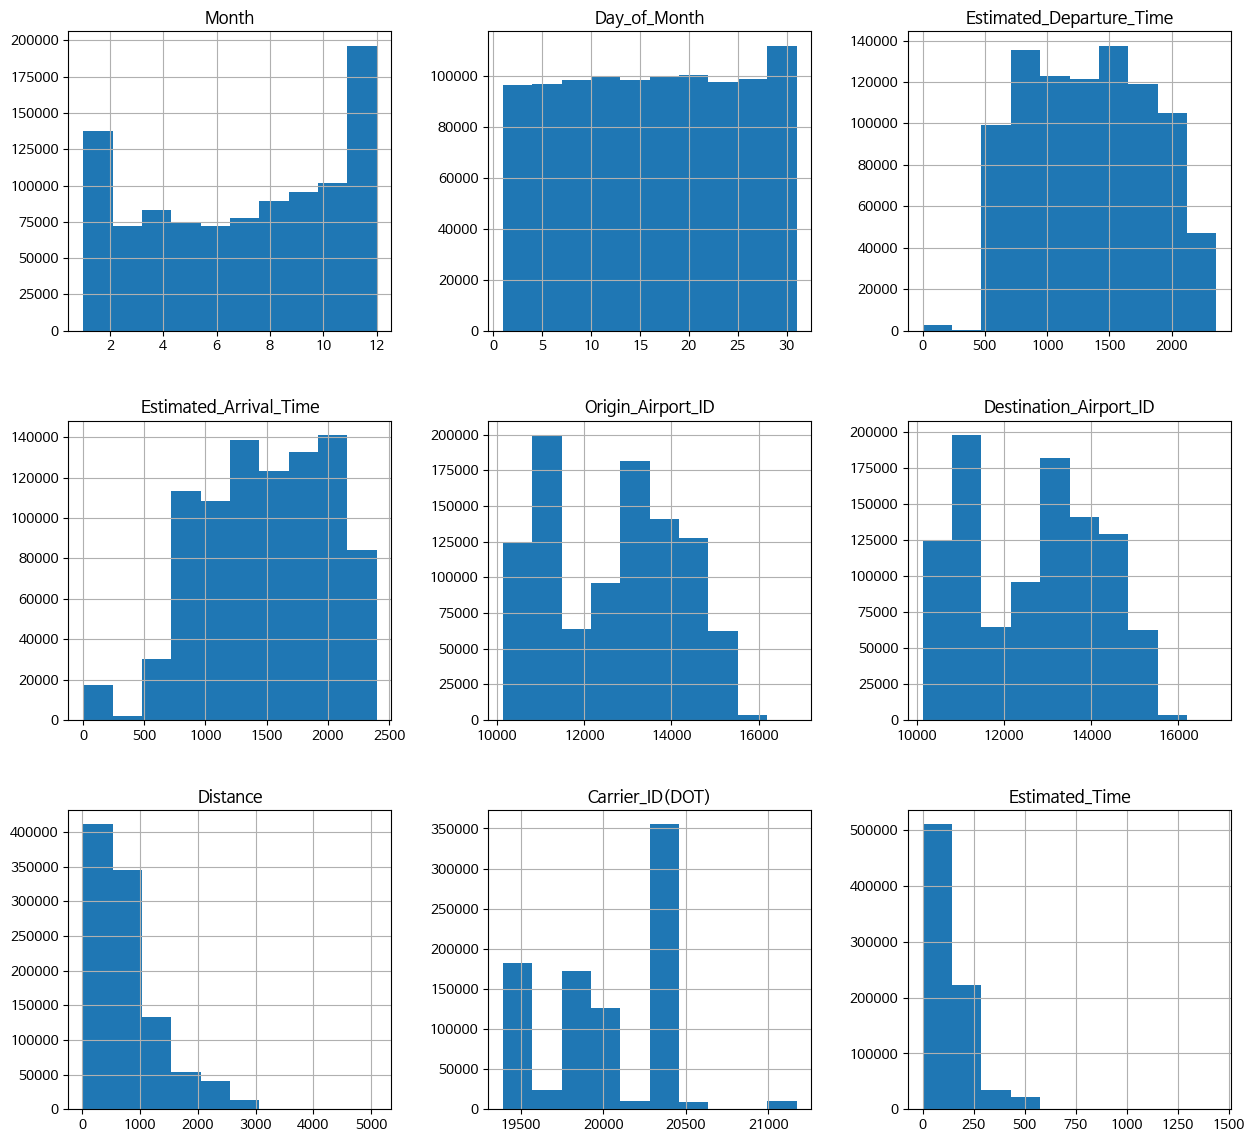

In [34]:
train.copy().drop(labels = ['Cancelled', 'Diverted'], axis = 1).hist(figsize= (15, 14))

1월과 2월 사이, 11월과 12월 사이에 가장 많은 여행을 보였으며, 

노선의 구분을 다음과 같이 정의 할 때, (North America 기준)

    American Airlines defines short-/medium-haul flights as being less than 3,000 mi (2,600 nmi; 4,800 km) and long-haul as either being more than 3,000 mi (2,600 nmi; 4,800 km) or being the New York–Los Angeles and New York–San Francisco routes.[22]
    United Airlines defines short-haul flights as being less than 700 mi (610 nmi; 1,100 km)[23] and long-haul flights as being greater than 3,000 mi (2,600 nmi; 4,800 km).[24]
    (https://en.wikipedia.org/wiki/Flight_length)
>> American Airlines 기준 <br>
>> 단거리/중거리: 3,000mi 미만<br>
>> 장거리: 3,000mi 이상

>> United Airlines 기준 <br>
>> 단거리: 700mi 미만<br>
>> 중거리: 700mi 이상, 3,000mi 미만<br>
>> 장거리: 3,000mi 이상

으로 볼 때, 단거리 비행이 가장 빈번하게 발생하는 것을 볼 수 있다. 또한, 예상 비행시간이 125분 미만(2시간 5분)이 가장 많으므로, 단거래 비행이 다수임을 뒷바침해준다.

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day_of_Month'}>,
        <Axes: title={'center': 'Estimated_Departure_Time'}>],
       [<Axes: title={'center': 'Estimated_Arrival_Time'}>,
        <Axes: title={'center': 'Origin_Airport_ID'}>,
        <Axes: title={'center': 'Destination_Airport_ID'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Carrier_ID(DOT)'}>,
        <Axes: title={'center': 'Estimated_Time'}>]], dtype=object)

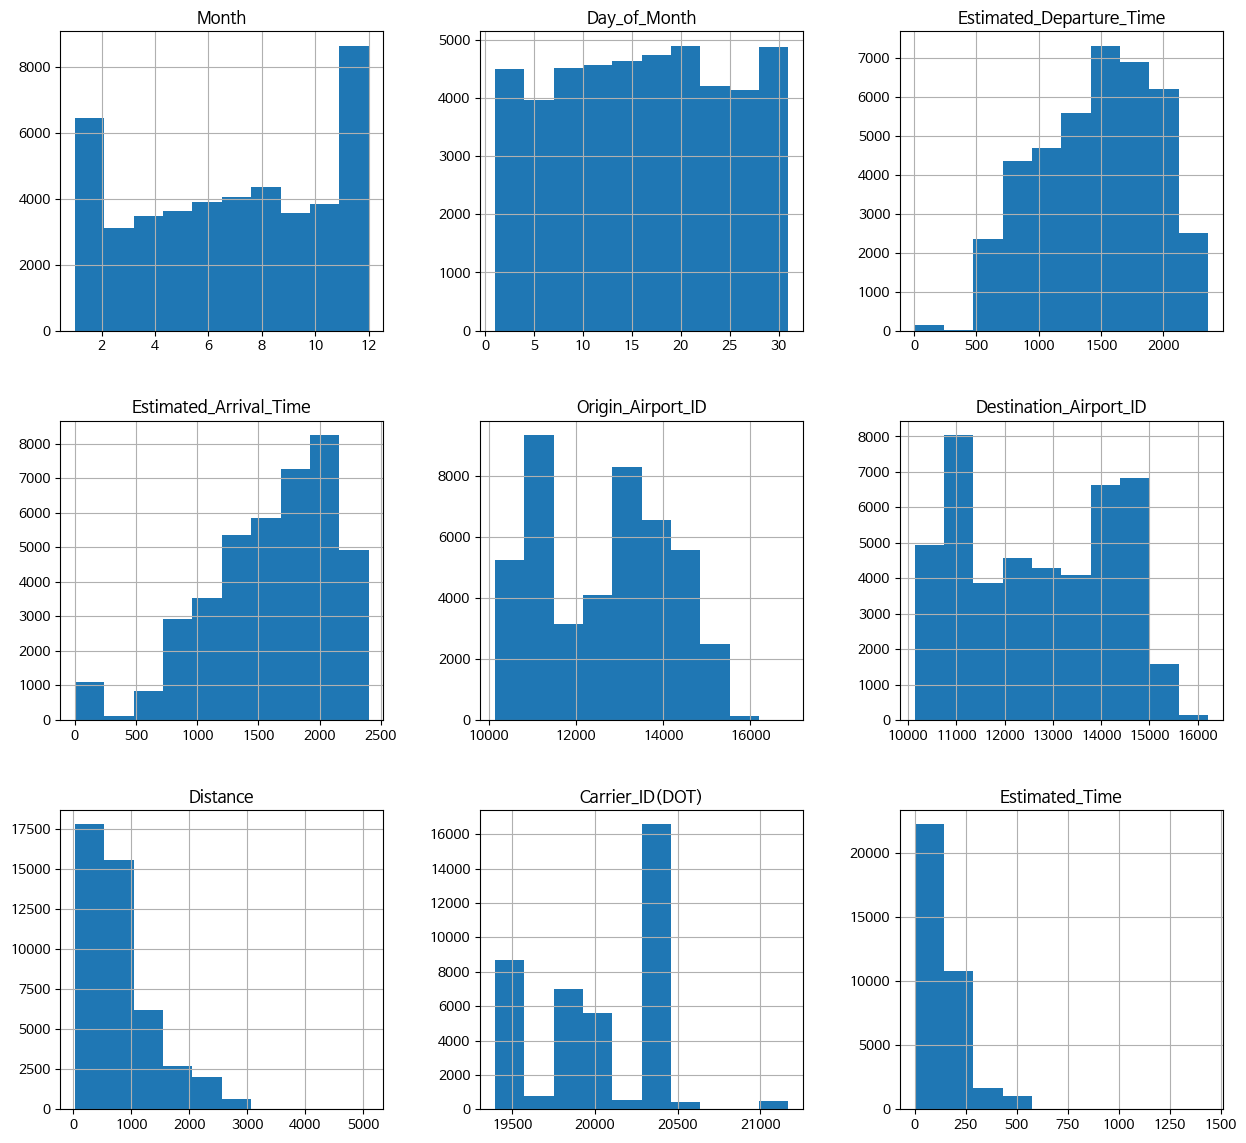

In [35]:
train[train.Delay == 'Delayed'].drop(labels = ['Cancelled', 'Diverted'], axis = 1).hist(figsize= (15, 14))

특히 비행기가 지연된 case에서 예상 출발 시간이 오후 8시에 가장 많이 딜레이 됐고, 예상 도착 시간이 오후 3시일 때 가장 많이 딜레이가 된 모습이다.

# 2023.04.07

확인해봐야 하는 것
* 지연된 Origin 항공의 빈도
* 지연된 Destination 항공의 빈도
* 지연과 날짜, 달 관계 (시계열, 계절성)
* 지연된 항공편은 우회(Diverted)나 취소(Cancel)이 되었는가?

Origin_Airport: 해당 항공편의 출발 공항의 IATA 코드 <br>
Origin_Airport_ID: 해당 항공편의 출발 공항의 고유 ID<br>

Destination_Airport: 해당 항공편의 도착 공항의 IATA 코드<br>
Destination_Airport_ID: 해당 항공편의 도착 공항의 고유 ID

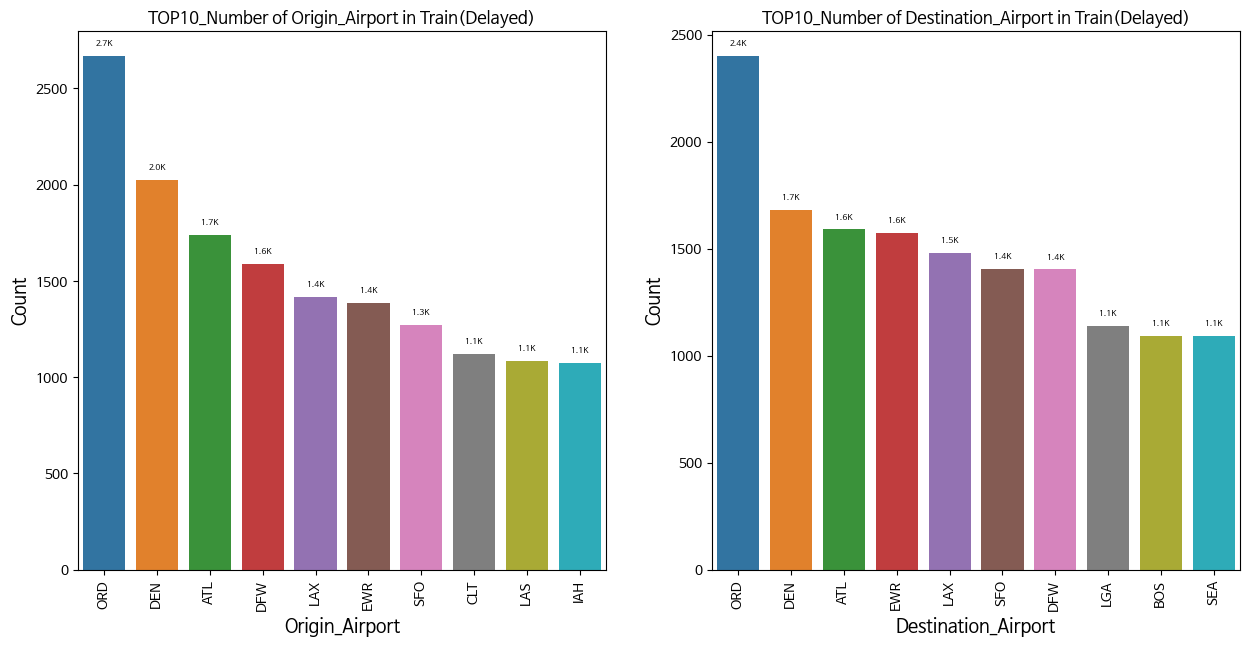

In [36]:
# Origin_Airport, Destination_Airport 개수 (Delayed)
train_origin =train[train.Delay == 'Delayed'].groupby("Origin_Airport").size()

train_origin = train_origin.reset_index()
train_origin.columns = ["state", "count"]
train_origin = train_origin.sort_values(by = "count", ascending = False)
train_origin['rank'] = train_origin['count'].rank(ascending=False) 
train_origin = train_origin[train_origin['rank']<= 10]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
splot=sns.barplot(x="state",y="count",data = train_origin)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Origin_Airport", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Origin_Airport in Train(Delayed)')

train_destrination = train[train.Delay == 'Delayed'].groupby("Destination_Airport").size()
train_destrination = train_destrination.reset_index()
train_destrination.columns = ["state", "count"]
train_destrination = train_destrination.sort_values(by = "count", ascending = False)
train_destrination['rank'] = train_destrination['count'].rank(ascending=False) 
train_destrination = train_destrination[train_destrination['rank']<= 10]

plt.subplot(1, 2, 2)
splot=sns.barplot(x="state",y="count",data=train_destrination)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Destination_Airport", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Destination_Airport in Train(Delayed)')

plt.show()

출발과 도착 지점에 가장 많이 Delay되는 항공사 TOP10씩 추리면 위와 같은 결과 나온다. Origin과 Destination에 공통적으로 연착이 많은 공항은 'ORD', 'DEN', 'ATL', 'LAX' 등으로 확인된다.

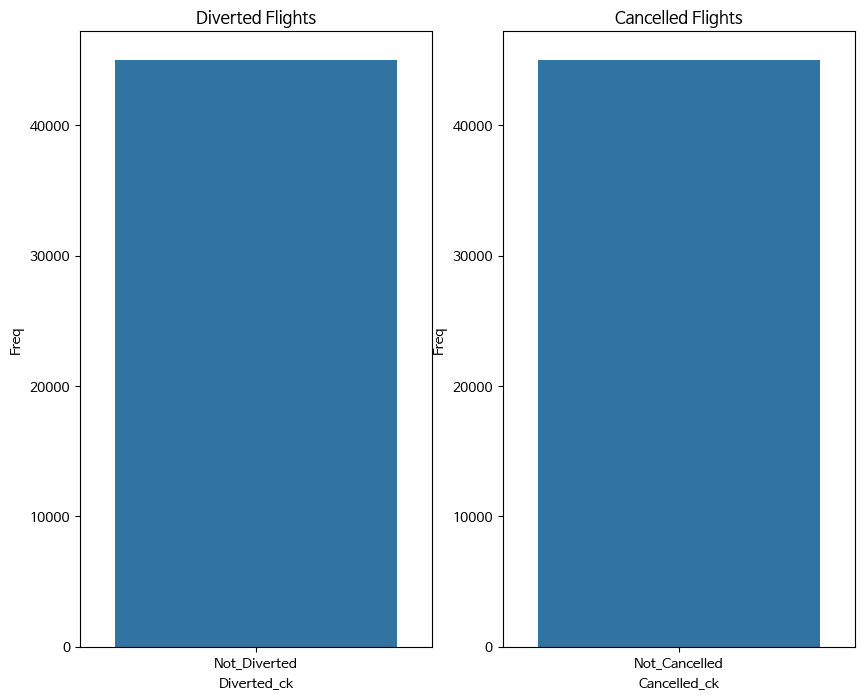

Delayed rows counts = 45000
 Not Diverted counts = 45000
 Not Cancelled counts = 45000


In [37]:
delay_tr = train.copy()[train.Delay == 'Delayed']
delay_tr['Diverted_ck'] = [i  if i != 0 else np.NaN for i in delay_tr['Diverted']] 
delay_tr['Diverted_ck'] = delay_tr['Diverted_ck'].fillna('Not_Diverted')
delay_tr['Cancelled_ck'] = [i  if i != 0 else np.NaN for i in delay_tr['Cancelled']] 
delay_tr['Cancelled_ck'] = delay_tr['Cancelled_ck'].fillna('Not_Cancelled')

f, ax= plt.subplots(1,2,figsize=(10,8))

sns.countplot(x = 'Diverted_ck', data = delay_tr, ax=ax[0])
ax[0].set_title('Diverted Flights')
ax[0].set_ylabel('Freq')

sns.countplot(x = 'Cancelled_ck', data = delay_tr, ax=ax[1])
ax[1].set_title('Cancelled Flights')
ax[1].set_ylabel('Freq')
plt.show()

print('Delayed rows counts = {:}\n Not Diverted counts = {:}\n Not Cancelled counts = {:}'
.format(delay_tr.shape[0], delay_tr[delay_tr['Diverted_ck'] == 'Not_Diverted'].shape[0], delay_tr[delay_tr['Cancelled_ck'] == 'Not_Cancelled'].shape[0])) 

그렇다면 Delayed 된다고 할 때, 항공편이 우회나 취소되는 경우가 있는지 확인해 보았다. 위 countplot은 우회되지 않았을 때, 취소되지 않았을 때의 빈도를 보여준다. Delayed하였을 때 빈도와 우회X, 취소X의 빈도가 같으므로 지연된 모든 항공편은 우회되거나 취소되지 않았다.

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  object 
 1   Month                           1000000 non-null  int64  
 2   Day_of_Month                    1000000 non-null  int64  
 3   Estimated_Departure_Time        890981 non-null   float64
 4   Estimated_Arrival_Time          890960 non-null   float64
 5   Cancelled                       1000000 non-null  int64  
 6   Diverted                        1000000 non-null  int64  
 7   Origin_Airport                  1000000 non-null  object 
 8   Origin_Airport_ID               1000000 non-null  int64  
 9   Origin_State                    890985 non-null   object 
 10  Destination_Airport             1000000 non-null  object 
 11  Destination_Airport_ID          1000000 non-null  int64  
 12  D

In [39]:
# 딜레이가 None이 아닐때 빈도 조사
map = {
    'Not_Delayed' :    0,
    'Delayed'    :    1, 
}
delayed_tr = train.copy()[['Month','Day_of_Month', 'Delay']][train['Delay'].astype(str) != 'None']
delayed_tr['Delay_le'] = delayed_tr.Delay.map(map)
delayed_tr

,Month,Day_of_Month,Delay,Delay_le
5,4,13,Not_Delayed,0
6,1,20,Not_Delayed,0
8,6,13,Not_Delayed,0
10,8,13,Delayed,1
12,1,12,Not_Delayed,0
...,...,...,...,...
999962,10,11,Not_Delayed,0
999963,5,2,Delayed,1
999969,10,10,Delayed,1
999985,8,8,Not_Delayed,0


In [40]:
#from sklearn import preprocessing
#delayed_tr = train.copy()[['Month','Day_of_Month', 'Delay']][train['Delay'].astype(str) != 'None']
#le = preprocessing.LabelEncoder()
#le.fit(delayed_tr.Delay.unique())
#delayed_tr['Delay_le'] = le.transform(delayed_tr.Delay)
#delayed_tr

In [41]:
month = delayed_tr[['Month', 'Delay_le']].groupby('Month').sum().sort_values(by='Delay_le',ascending=False)
month['PERCENTUAL'] = month['Delay_le']/(month['Delay_le'].sum())*100
print('>> Delayed flights by month <<')
print(month)

month_day = delayed_tr[['Day_of_Month', 'Delay_le']].groupby('Day_of_Month').sum().sort_values(by='Delay_le',ascending=False)
month_day['PERCENTUAL'] = month_day['Delay_le']/(month_day['Delay_le'].sum())*100
print('>> Delayed flights by monthday <<')
print(month_day)

>> Delayed flights by month <<
       Delay_le  PERCENTUAL
Month                      
12         4623   10.273333
8          4364    9.697778
7          4040    8.977778
11         4021    8.935556
6          3906    8.680000
10         3835    8.522222
5          3629    8.064444
9          3563    7.917778
4          3474    7.720000
1          3348    7.440000
3          3108    6.906667
2          3089    6.864444
>> Delayed flights by monthday <<
              Delay_le  PERCENTUAL
Day_of_Month                      
20                1711    3.802222
21                1686    3.746667
15                1639    3.642222
18                1615    3.588889
16                1585    3.522222
12                1561    3.468889
9                 1553    3.451111
1                 1548    3.440000
8                 1545    3.433333
2                 1541    3.424444
17                1532    3.404444
11                1511    3.357778
14                1502    3.337778
19                

월로 보면 12월과 8월에 지연이 잦았고, 일간으로 보면 20, 21일과 15, 16일에 지연 빈도가 높았음.

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  object 
 1   Month                           1000000 non-null  int64  
 2   Day_of_Month                    1000000 non-null  int64  
 3   Estimated_Departure_Time        890981 non-null   float64
 4   Estimated_Arrival_Time          890960 non-null   float64
 5   Cancelled                       1000000 non-null  int64  
 6   Diverted                        1000000 non-null  int64  
 7   Origin_Airport                  1000000 non-null  object 
 8   Origin_Airport_ID               1000000 non-null  int64  
 9   Origin_State                    890985 non-null   object 
 10  Destination_Airport             1000000 non-null  object 
 11  Destination_Airport_ID          1000000 non-null  int64  
 12  D

In [43]:
def time_gb(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'

# 예상 출발, 도착시간 그룹 화
train['Dep_time_gb'] = train['Estimated_Departure_Time'].dropna().apply(time_gb)
train['Arr_time_gb'] = train['Estimated_Arrival_Time'].dropna().apply(time_gb)
train

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time,Dep_time_gb,Arr_time_gb
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,...,Southwest Airlines Co.,WN,19393.0,N7858A,None,NaN,NaN,NaN,NaN,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,SkyWest Airlines Inc.,UA,20304.0,N125SY,None,07:40,10:24,164.0,0700-0759,1000-1059
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,American Airlines Inc.,AA,19805.0,N103US,None,16:10,18:05,115.0,1600-1659,1800-1859
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,United Air Lines Inc.,UA,NaN,N595UA,None,09:05,17:35,510.0,0900-0959,1700-1759
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,SkyWest Airlines Inc.,UA,20304.0,N161SY,None,09:00,10:19,79.0,0900-0959,1000-1059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,None,...,United Air Lines Inc.,UA,19977.0,N477UA,None,09:36,12:43,187.0,0900-0959,1200-1259
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,None,...,SkyWest Airlines Inc.,DL,NaN,N439SW,None,09:20,10:28,68.0,0900-0959,1000-1059
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,None,...,Southwest Airlines Co.,WN,19393.0,N230WN,None,08:00,13:40,340.0,0800-0859,1300-1359
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,...,Delta Air Lines Inc.,DL,19790.0,N968DL,None,16:13,18:24,131.0,1600-1659,1800-1859


In [44]:
# 딜레이가 None이 아닐때 빈도 조사
map = {
    'Not_Delayed' :    0,
    'Delayed'    :    1, 
}
time_gb_tr = train.copy()[['Dep_time_gb','Arr_time_gb', 'Delay']][train['Delay'].astype(str) != 'None']
time_gb_tr['Delay_le'] = time_gb_tr.Delay.map(map)
time_gb_tr

,Dep_time_gb,Arr_time_gb,Delay,Delay_le
5,1500-1559,NaN,Not_Delayed,0
6,1700-1759,1900-1959,Not_Delayed,0
8,1400-1459,1500-1559,Not_Delayed,0
10,1700-1759,1800-1859,Delayed,1
12,1000-1059,1100-1159,Not_Delayed,0
...,...,...,...,...
999962,NaN,2000-2059,Not_Delayed,0
999963,1700-1759,1900-1959,Delayed,1
999969,0900-0959,1000-1059,Delayed,1
999985,1900-1959,2000-2059,Not_Delayed,0


>> Delayed flights by Departure group time <<
             Delay_le  PERCENTUAL
Dep_time_gb                      
1700-1759        3413    8.513557
1800-1859        3185    7.944823
1900-1959        2982    7.438449
1500-1559        2908    7.253860
1600-1659        2772    6.914615
1400-1459        2756    6.874704
2000-2059        2545    6.348375
1200-1259        2430    6.061513
1300-1359        2350    5.861957
1100-1159        2271    5.664896
1000-1059        2039    5.086183
0800-0859        1840    4.589788
0900-0959        1808    4.509965
2100-2159        1659    4.138292
0700-0759        1643    4.098381
0600-0659        1393    3.474769
2200-2259        1209    3.015790
0001-0559         566    1.411859
2300-2400         320    0.798224
>> Delayed flights by Arrival group time <<
             Delay_le  PERCENTUAL
Arr_time_gb                      
2100-2159        3208    7.999402
2000-2059        3175    7.917113
1900-1959        3137    7.822357
1800-1859        3040    7

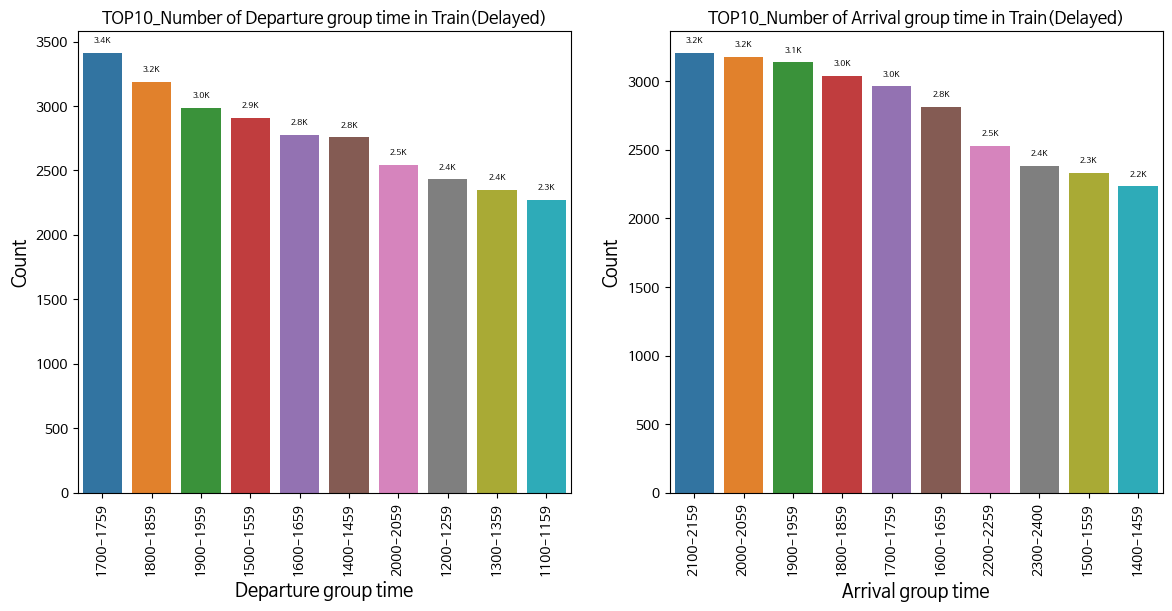

In [45]:
time_gb_Dep = time_gb_tr[['Dep_time_gb','Delay_le']].groupby('Dep_time_gb').sum().sort_values(by='Delay_le',ascending=False)
time_gb_Dep['PERCENTUAL'] = time_gb_Dep['Delay_le']/(time_gb_Dep['Delay_le'].sum())*100
print('>> Delayed flights by Departure group time <<')
print(time_gb_Dep)

time_gb_Arr = time_gb_tr[['Arr_time_gb','Delay_le']].groupby('Arr_time_gb').sum().sort_values(by='Delay_le',ascending=False)
time_gb_Arr['PERCENTUAL'] = time_gb_Arr['Delay_le']/(time_gb_Arr['Delay_le'].sum())*100
print('>> Delayed flights by Arrival group time <<')
print(time_gb_Arr)

time_gb_Dep = time_gb_Dep.reset_index()
time_gb_Dep = time_gb_Dep.sort_values(by = "Delay_le", ascending = False)
time_gb_Dep['rank'] = time_gb_Dep['Delay_le'].rank(ascending=False) 
time_gb_Dep = time_gb_Dep[time_gb_Dep['rank']<= 10]

f, ax= plt.subplots(1,2,figsize=(14,6))

splot=sns.barplot(x="Dep_time_gb",y="Delay_le",data = time_gb_Dep, ax=ax[0])
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[0].set_xlabel("Departure group time", size =13)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel("Count",size =13)
ax[0].set_title('TOP10_Number of Departure group time in Train(Delayed)')

time_gb_Arr = time_gb_Arr.reset_index()
time_gb_Arr = time_gb_Arr.sort_values(by = "Delay_le", ascending = False)
time_gb_Arr['rank'] = time_gb_Arr['Delay_le'].rank(ascending=False) 
time_gb_Arr = time_gb_Arr[time_gb_Arr['rank']<= 10]
splot=sns.barplot(x="Arr_time_gb",y="Delay_le",data = time_gb_Arr, ax=ax[1])
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[1].set_xlabel("Arrival group time", size =13)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel("Count",size =13)
ax[1].set_title('TOP10_Number of Arrival group time in Train(Delayed)')

plt.show()

출발 예정 시간이 오후 5시부터 8시 사이에 지연이 가장 많았으며, 도착 예정 시간이 오후 7시에서 10시에 지연이 가장 많았다. 이는 특정 시간에 2~3시간 내외의 단거리 비행에서 딜레이가 많았다는 것을 어림 짐작할 수 있다.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  object 
 1   Month                           1000000 non-null  int64  
 2   Day_of_Month                    1000000 non-null  int64  
 3   Estimated_Departure_Time        890981 non-null   float64
 4   Estimated_Arrival_Time          890960 non-null   float64
 5   Cancelled                       1000000 non-null  int64  
 6   Diverted                        1000000 non-null  int64  
 7   Origin_Airport                  1000000 non-null  object 
 8   Origin_Airport_ID               1000000 non-null  int64  
 9   Origin_State                    890985 non-null   object 
 10  Destination_Airport             1000000 non-null  object 
 11  Destination_Airport_ID          1000000 non-null  int64  
 12  D

마지막으로          

        United Airlines 기준
        단거리: 700mi 미만
        중거리: 700mi 이상, 3,000mi 미만
        장거리: 3,000mi 이상

의 기준으로 단거리, 중거리, 장거리 비행 노선의 구분과 빈도를 확인한다

In [47]:
def distance_gb(x):
  if x < 700 :
    return 'short_route'
  elif x>=700 and x<3000:
    return 'mid_route'
  elif x>=3000:
    return 'long_route'    

In [48]:
# 예상 출발, 도착시간 그룹 화
train['route_gb'] = train['Distance'].apply(distance_gb)
train

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time,Dep_time_gb,Arr_time_gb,route_gb
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,...,WN,19393.0,N7858A,None,NaN,NaN,NaN,NaN,NaN,short_route
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,UA,20304.0,N125SY,None,07:40,10:24,164.0,0700-0759,1000-1059,mid_route
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,AA,19805.0,N103US,None,16:10,18:05,115.0,1600-1659,1800-1859,short_route
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,UA,NaN,N595UA,None,09:05,17:35,510.0,0900-0959,1700-1759,mid_route
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,UA,20304.0,N161SY,None,09:00,10:19,79.0,0900-0959,1000-1059,short_route
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,None,...,UA,19977.0,N477UA,None,09:36,12:43,187.0,0900-0959,1200-1259,short_route
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,None,...,DL,NaN,N439SW,None,09:20,10:28,68.0,0900-0959,1000-1059,short_route
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,None,...,WN,19393.0,N230WN,None,08:00,13:40,340.0,0800-0859,1300-1359,mid_route
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,...,DL,19790.0,N968DL,None,16:13,18:24,131.0,1600-1659,1800-1859,short_route


In [49]:
# 딜레이가 None이 아닐때 빈도 조사
map = {
    'Not_Delayed' :    0,
    'Delayed'    :    1, 
}
route_gb = train.copy()[['route_gb', 'Delay']][train['Delay'].astype(str) != 'None']
route_gb['Delay_le'] = time_gb_tr.Delay.map(map)
route_gb

,route_gb,Delay,Delay_le
5,short_route,Not_Delayed,0
6,short_route,Not_Delayed,0
8,short_route,Not_Delayed,0
10,short_route,Delayed,1
12,mid_route,Not_Delayed,0
...,...,...,...
999962,mid_route,Not_Delayed,0
999963,short_route,Delayed,1
999969,short_route,Delayed,1
999985,short_route,Not_Delayed,0


>> Delayed flights by Route_gb <<
             Delay_le  PERCENTUAL
route_gb                         
short_route     23798   52.884444
mid_route       21140   46.977778
long_route         62    0.137778


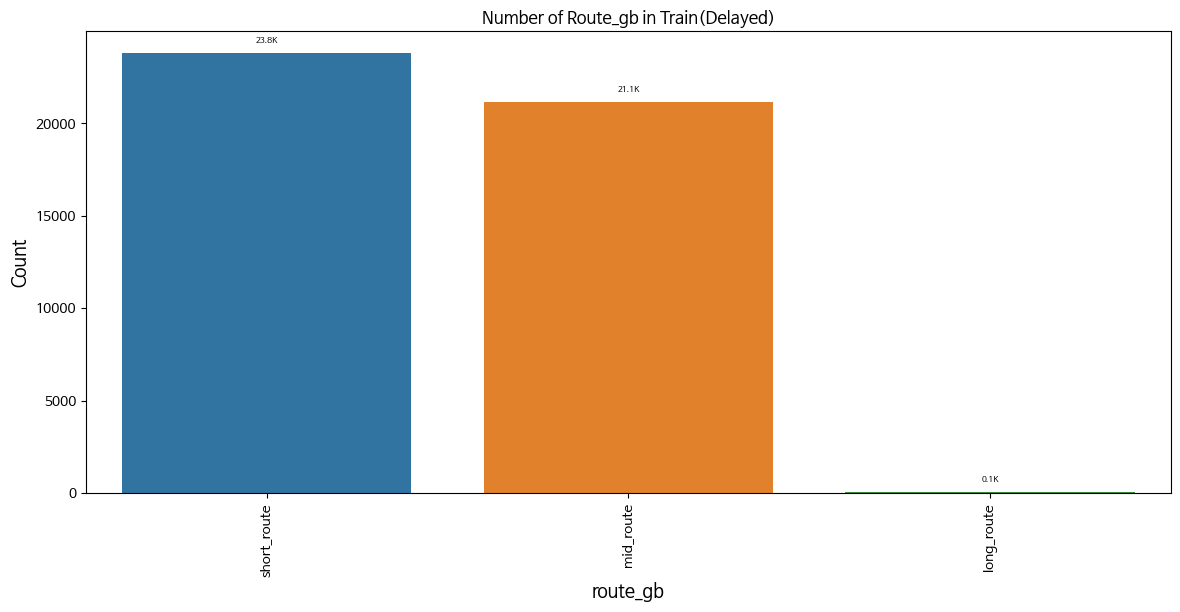

In [50]:
route_gb = route_gb[['route_gb','Delay_le']].groupby('route_gb').sum().sort_values(by='Delay_le',ascending=False)
route_gb['PERCENTUAL'] = route_gb['Delay_le']/(route_gb['Delay_le'].sum())*100
print('>> Delayed flights by Route_gb <<')
print(route_gb)


route_gb = route_gb.reset_index()
route_gb = route_gb.sort_values(by = "Delay_le", ascending = False)

f, ax= plt.subplots(1,1,figsize=(14,6))

splot=sns.barplot(x="route_gb",y="Delay_le",data = route_gb)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_xlabel("route_gb", size =13)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Count",size =13)
ax.set_title('Number of Route_gb in Train(Delayed)')

plt.show()

대부분의 지연 상황은 단거리, 중거리 비행에서 나타나는 것을 확인할 수 있다.

# Preprecessing
비지도학습 훈련에 앞서 누락된 값들을 최대한 채워넣어야한다. 특히 특정 위치에 있는 공항은 States의 누락 등을 확인할 수 있기 때문에 값을 채워 넣는 대 수월할 것이다. 다시한번 누락된 값들을 조회해보자

                          결손값 개수  결손값_ratio
Estimated_Arrival_Time    109048   0.109048
Carrier_ID(DOT)           109006   0.109006
Carrier_Code(IATA)        108993   0.108993
Estimated_Departure_Time  108984   0.108984
Airline                   106527   0.106527
Destination_State         106523   0.106523
Origin_State              106505   0.106505
Destination_Airport            0   0.000000
Distance                       0   0.000000
Destination_Airport_ID         0   0.000000
ID                             0   0.000000
Month                          0   0.000000
Origin_Airport_ID              0   0.000000
Origin_Airport                 0   0.000000
Diverted                       0   0.000000
Cancelled                      0   0.000000
Day_of_Month                   0   0.000000
Tail_Number                    0   0.000000
                                결손값 개수  결손값_ratio
Delay                           744999   0.744999
Estimated_Time                  206371   0.206371
Destination_St

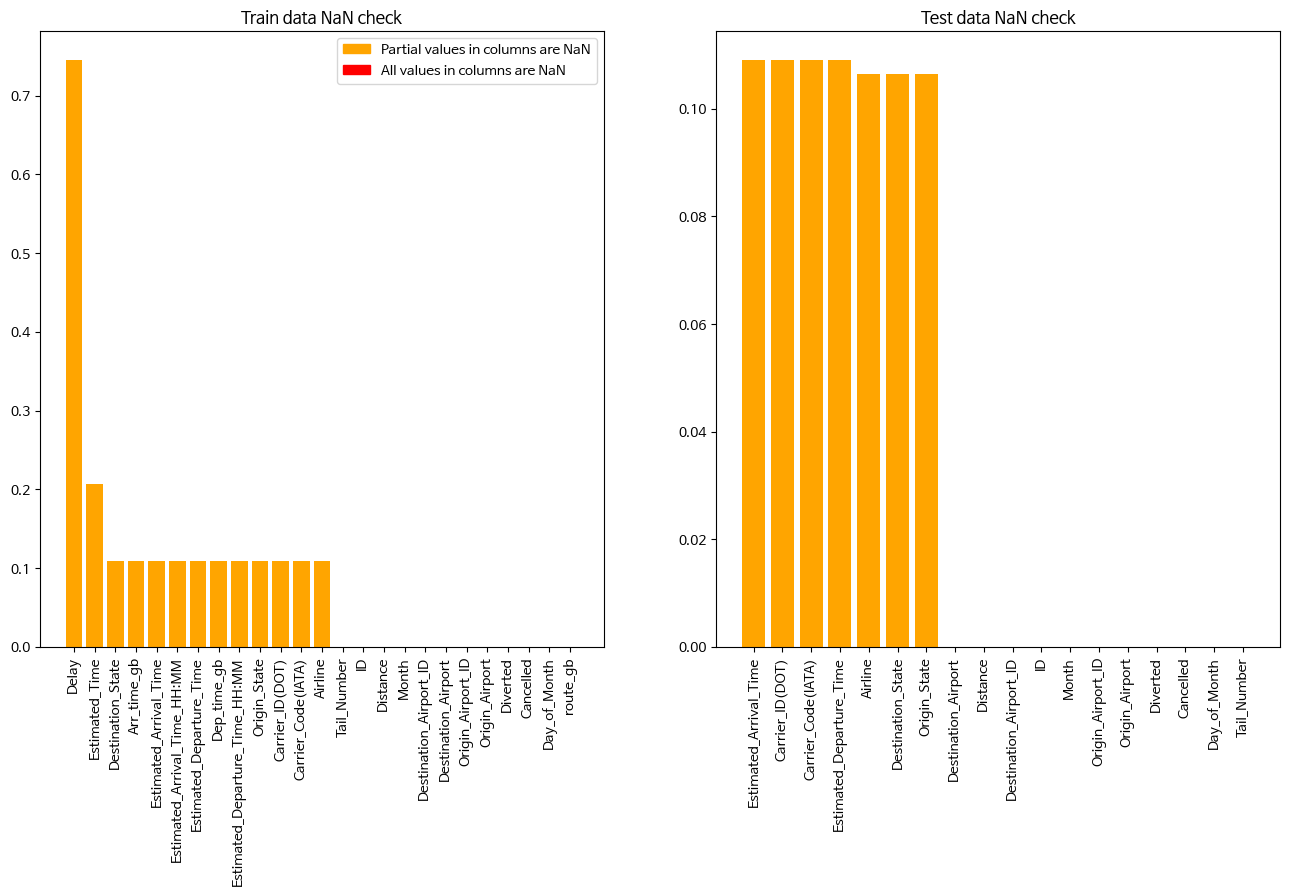

In [51]:
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

column = ['결손값 개수']
axis_1 = pd.DataFrame(data = train.isnull().sum(axis=1), columns = column)
axis_1 = axis_1.sort_values(by = '결손값 개수', ascending = False)

train.isnull().sum(axis=0)
train_row_NaN = pd.DataFrame(train.isnull().sum(axis=0), columns = column)
train_row_NaN = train_row_NaN.sort_values(by = '결손값 개수', ascending = False)
train_row_su = train.shape[0]
train_row_NaN['결손값_ratio'] = train_row_NaN['결손값 개수']/train_row_su

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (16,8))
x = np.arange(len(train_row_NaN.index))
plt.subplot(1, 2, 1)
plt.xticks(x, train_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])

def color(data):
    if data == 1:
        return 'red'
    else:
        return 'orange'
plt.bar(x, train_row_NaN['결손값_ratio'], color = [color(i) for i in train_row_NaN['결손값_ratio']])
plt.title('Train data NaN check')

test.isnull().sum(axis=0)
test_row_NaN = pd.DataFrame(test.isnull().sum(axis=0), columns = column)
test_row_NaN = test_row_NaN.sort_values(by = '결손값 개수', ascending = False)
test_row_su = test.shape[0]
test_row_NaN['결손값_ratio'] = test_row_NaN['결손값 개수']/test_row_su

plt.subplot(1, 2, 2)
x2 = np.arange(len(test_row_NaN.index))
plt.xticks(x2, test_row_NaN.index)
plt.xticks(rotation=90)
plt.bar(x2, test_row_NaN['결손값_ratio'], color = [color(i) for i in test_row_NaN['결손값_ratio']])
plt.title('Test data NaN check')

print(test_row_NaN)
print(train_row_NaN)
plt.show()

EDA를 통해 얻어진 Estimated_Time, Arr_time_gb, Dep_time_gb 등은 기존 데이터가 Null이기 때문에 발생한다. 현 전처리의 Aim은 Origin_State와 Destination_State, Airline 등을 Null이 아닌 데이터를 활용하여 값을 채워넣어보자. 

In [52]:
train[(train['Origin_Airport'] == 'ORD') & (train['Origin_State'] != 'Illinois')].head(10)

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time,Dep_time_gb,Arr_time_gb,route_gb
315,TRAIN_000315,8,7,1150.0,1452.0,0,0,ORD,13930,None,...,AA,19805.0,N521UW,None,11:50,14:52,182.0,1100-1159,1400-1459,short_route
474,TRAIN_000474,9,14,1125.0,1350.0,0,0,ORD,13930,None,...,UA,19977.0,N23721,None,11:25,13:50,145.0,1100-1159,1300-1359,short_route
523,TRAIN_000523,2,16,1300.0,1440.0,0,0,ORD,13930,None,...,UA,20500.0,N161GJ,Not_Delayed,13:00,14:40,100.0,1300-1359,1400-1459,short_route
819,TRAIN_000819,5,11,900.0,1226.0,0,0,ORD,13930,None,...,UA,20046.0,N430AW,Delayed,09:00,12:26,206.0,0900-0959,1200-1259,mid_route
1087,TRAIN_001087,8,15,1400.0,1715.0,0,0,ORD,13930,None,...,UA,20452.0,N732YX,None,14:00,17:15,195.0,1400-1459,1700-1759,short_route
1158,TRAIN_001158,10,25,1200.0,NaN,0,0,ORD,13930,None,...,AA,20398.0,N694AE,Not_Delayed,12:00,NaN,NaN,1200-1259,NaN,short_route
1617,TRAIN_001617,8,15,1540.0,1812.0,0,0,ORD,13930,None,...,UA,19977.0,N839UA,None,15:40,18:12,152.0,1500-1559,1800-1859,mid_route
1785,TRAIN_001785,4,20,1415.0,NaN,0,0,ORD,13930,None,...,UA,19977.0,N75854,None,14:15,NaN,NaN,1400-1459,NaN,mid_route
2165,TRAIN_002165,3,26,505.0,756.0,0,0,ORD,13930,None,...,UA,19977.0,N63820,None,05:05,07:56,171.0,0001-0559,0700-0759,mid_route
2207,TRAIN_002207,8,13,1755.0,1957.0,0,0,ORD,13930,None,...,UA,20304.0,N937SW,None,17:55,19:57,122.0,1700-1759,1900-1959,short_route


예를 들어 Delay가 가장 많았던 항공사 'ORD'를 기준으로 출발 도시가 일리노이 주가 아닌 값을 조회한다. Origin_Airport, Origin_Airport_ID, Origin_State는 특정 도시 기준으로 묶여있다고 봐야한다. 그렇다면 세 값 중 하나만 있다면 나머지 null 값을 채울 수 있을 것이다. 비슷하게 도착지의 값도 채울 수 있다.

In [53]:
origin_state = train[['Origin_Airport','Origin_Airport_ID','Origin_State']].dropna()
origin_state = origin_state.drop_duplicates()
origin_state.columns = ['Origin_Airport','Origin_Airport_ID','F_Origin_State']
Destination_state = train[['Destination_Airport','Destination_Airport_ID','Destination_State']].dropna()
Destination_state = Destination_state.drop_duplicates()
Destination_state.columns = ['Destination_Airport','Destination_Airport_ID','F_Destination_State']

# 20230410
#### 누락값 처리 전처리 과정

1. 비행기 출발, 도착지 누락값 채우기
2. 항공사 관련 데이터 넣기 (크롤링 사용)
3. 예상 출발/도착 시간 넣기
4. 위 결과를 토대로 준지도학습을 통해 Delay라벨 값 넣기

In [54]:
train = pd.merge(train, origin_state, on = ['Origin_Airport','Origin_Airport_ID'], how = 'outer')
train = pd.merge(train, Destination_state, on = ['Destination_Airport','Destination_Airport_ID'], how = 'outer')
train

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time,Dep_time_gb,Arr_time_gb,route_gb,F_Origin_State,F_Destination_State
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,...,N7858A,None,NaN,NaN,NaN,NaN,NaN,short_route,Oklahoma,Texas
1,TRAIN_000827,7,16,550.0,715.0,0,0,OKC,13851,Oklahoma,...,N733SA,None,05:50,07:15,85.0,0001-0559,0700-0759,short_route,Oklahoma,Texas
2,TRAIN_001452,1,13,1405.0,1535.0,0,0,OKC,13851,Oklahoma,...,N204WN,None,14:05,15:35,90.0,1400-1459,1500-1559,short_route,Oklahoma,Texas
3,TRAIN_004015,5,17,1050.0,1215.0,0,0,OKC,13851,Oklahoma,...,N246LV,None,10:50,12:15,85.0,1000-1059,1200-1259,short_route,Oklahoma,Texas
4,TRAIN_009325,8,14,600.0,725.0,0,0,OKC,13851,Oklahoma,...,N7706A,None,06:00,07:25,85.0,0600-0659,0700-0759,short_route,Oklahoma,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_896461,11,26,1310.0,NaN,0,0,JMS,12519,North Dakota,...,N915SW,None,13:10,NaN,NaN,1300-1359,NaN,short_route,North Dakota,North Dakota
999996,TRAIN_908847,1,5,1320.0,1408.0,0,0,JMS,12519,None,...,N928EV,Not_Delayed,13:20,14:08,48.0,1300-1359,1400-1459,short_route,North Dakota,North Dakota
999997,TRAIN_911180,4,5,1315.0,1403.0,0,0,JMS,12519,North Dakota,...,N951SW,None,13:15,14:03,48.0,1300-1359,1400-1459,short_route,North Dakota,North Dakota
999998,TRAIN_947096,11,11,1310.0,1355.0,0,0,JMS,12519,North Dakota,...,N701BR,None,13:10,13:55,45.0,1300-1359,1300-1359,short_route,North Dakota,North Dakota


In [55]:
mask = (train['Destination_Airport'] == 'YNG')&(train['Destination_Airport_ID'] == 16133)
value = 'Indiana'

train.loc[mask,'F_Destination_State'] = train.loc[mask,'F_Destination_State'].fillna(value) 

In [56]:
train[train['Destination_Airport'] == 'YNG']

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Tail_Number,Delay,Estimated_Departure_Time_HH:MM,Estimated_Arrival_Time_HH:MM,Estimated_Time,Dep_time_gb,Arr_time_gb,route_gb,F_Origin_State,F_Destination_State
998941,TRAIN_126925,1,1,1500.0,1717.0,0,0,SFB,14761,Florida,...,402NV,None,15:00,17:17,137.0,1500-1559,1700-1759,mid_route,Florida,Indiana


outer join 했을 때, 도착 공항이 'YNG'를 제외한 모든 state를 채울 수 있다. YNG는 미국 Indiana주의 도시이다. 따라서 남은 null은 'Indiana'로 갈음

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  object 
 1   Month                           1000000 non-null  int64  
 2   Day_of_Month                    1000000 non-null  int64  
 3   Estimated_Departure_Time        890981 non-null   float64
 4   Estimated_Arrival_Time          890960 non-null   float64
 5   Cancelled                       1000000 non-null  int64  
 6   Diverted                        1000000 non-null  int64  
 7   Origin_Airport                  1000000 non-null  object 
 8   Origin_Airport_ID               1000000 non-null  int64  
 9   Origin_State                    890985 non-null   object 
 10  Destination_Airport             1000000 non-null  object 
 11  Destination_Airport_ID          1000000 non-null  int64  
 12  D

In [58]:
Airline_store = train[['Airline', 'Carrier_ID(DOT)','Tail_Number']].drop_duplicates().dropna()[['Airline','Tail_Number']]
Airline_store.groupby('Tail_Number')['Airline'].count().sort_values()
Airline_store[Airline_store['Tail_Number'] == 'N922VA']

,Airline,Tail_Number
11833,Virgin America,N922VA
124760,Alaska Airlines Inc.,N922VA


In [59]:
a = train[['Tail_Number','Carrier_ID(DOT)']].drop_duplicates()
a.groupby('Tail_Number')['Carrier_ID(DOT)'].count().sort_values()

Tail_Number
N531GJ    0
N721AN    0
N867DA    0
N363PH    0
N929DL    0
         ..
N854VA    2
N922VA    2
N854AS    2
N656AE    2
N759EV    2
Name: Carrier_ID(DOT), Length: 6430, dtype: int64

In [60]:
a[a['Tail_Number']=='N907EV']

,Tail_Number,Carrier_ID(DOT)
14486,N907EV,20304.0
31089,N907EV,NaN


# 2023.04.11
항공사 N-number로 항공사명 찾기

Base: https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download?print=go

train 자료의 년도가 명확치 않아 17년도 DB부터 22년까지 하나씩 비교 중

In [101]:
import itertools
import pandas as pd

master_dil = '/content/drive/MyDrive/데이콘/데이콘 항공편 지연/데이콘_항공편_지연/ReleasableAircraft.2019/MASTER.txt'
data = []
with open(master_dil, 'r', encoding = "utf-8-sig") as file:
           data.append(file.readlines())
           
data = list(itertools.chain(*data))  
data = [line.split(',') for line in data]
col = data[0]
#col_store = col.copy()
#data = [i[:35] for i in data]
#len(col_store)
df = pd.DataFrame(data, columns = col)

In [102]:
df

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,\n
0,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,\n
1,1,1071,3980115,54556,1988,5,FEDERAL AVIATION ADMINISTRATION ...,6500 S MACARTHUR BLVD,HGR 9E BLDG 10 ROOM 303,OKLAHOMA CITY,...,...,...,...,...,20221130,00524101,,,A00001,\n
2,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20200430,00600060,,,A004B3,\n
3,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,...,20220228,00432072,,,A00726,\n
4,10002,79-030,8930105,41525,1979,3,ENGLISH AIR SERVICE ...,3409 CORSAIR CIR,,SANTA MARIA,...,...,...,...,...,20201031,00831480,,,A00727,\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290096,9ZS,20004,5760102,00000,1974,1,COLLINS BRIAN D ...,42 BOGART DR,,PETERSBURG,...,...,...,...,...,20210831,00221481,,,AC6CCA,\n
290097,9ZT,0088,2130001,17042,2001,3,AIRCRAFT GUARANTY CORP TRUSTEE ...,PO BOX 2547,,ONALASKA,...,...,...,...,...,20200831,00233847,,,AC6CCB,\n
290098,9ZU,18-7028,7101828,41508,1959,1,FOWLER RONALD W ...,478 AIRPORT RD,,LOPEZ ISLAND,...,...,...,...,...,20201130,00264074,,,AC6CCC,\n
290099,9ZV,3793,1181511,03020,1984,7,L & R INVESTMENT PARTNERS LLC ...,160 GREENTREE DR STE 101,,DOVER,...,...,...,...,...,20220930,00281264,,,AC6CCD,\n


In [104]:
df['Tail_Number'] = ['N' + i for i in df['N-NUMBER']]

In [108]:
df[df['N-NUMBER'] == '948SW']

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,\n,Tail_Number
275873,948SW,7789,1390008,30015,2003,3,SKYWEST AIRLINES INC ...,444 S RIVER RD,,SAINT GEORGE,...,...,...,...,20220131,00049379,,,AD2C85,\n,N948SW


In [109]:
Airline = df[['Tail_Number', 'NAME']]

In [110]:
train_ar = pd.merge(train, Airline, left_on = 'Tail_Number', right_on = 'Tail_Number', how = 'left')

뱅기 히스토리 보는 곳

https://onespotter.com/aircraft/fid/292458/N701BR

https://flightaware.com/resources/registration/N701BR

In [113]:
train_ar[['Airline', 'Tail_Number', 'Tail_Number','NAME']]#[train['Tail_Number'].astype(str) == 'nan']

,Airline,Tail_Number,Tail_Number,NAME
0,Southwest Airlines Co.,N7858A,N7858A,WILMINGTON TRUST CO TRUSTEE ...
1,Southwest Airlines Co.,N733SA,N733SA,SOUTHWEST AIRLINES CO ...
2,Southwest Airlines Co.,N204WN,N204WN,SOUTHWEST AIRLINES CO ...
3,Southwest Airlines Co.,N246LV,N246LV,SOUTHWEST AIRLINES CO ...
4,Southwest Airlines Co.,N7706A,N7706A,AFS INVESTMENTS 56 LLC ...
...,...,...,...,...
999995,None,N915SW,N915SW,SKYWEST AIRLINES INC ...
999996,SkyWest Airlines Inc.,N928EV,N928EV,SKYWEST AIRLINES INC ...
999997,SkyWest Airlines Inc.,N951SW,N951SW,SKYWEST AIRLINES INC ...
999998,SkyWest Airlines Inc.,N701BR,N701BR,BANK OF UTAH TRUSTEE ...


In [112]:
def feature_engineering(t):
	time_list = [i if str(i) == 'nan' else str(int(i))  for i in t['Estimated_Departure_Time'] ]
	time_list1 = [i if str(i) == 'nan' else str(int(i))  for i in t['Estimated_Arrival_Time'] ]
	t['Estimated_Departure_Time_HH:MM'] = to_time(time_list)
	t['Estimated_Arrival_Time_HH:MM'] = to_time(time_list1)
	
	# 예상 비행시간 만들기 (분으로 만들기)
	est_time = []
	for i,j in zip(t['Estimated_Arrival_Time_HH:MM'], t['Estimated_Departure_Time_HH:MM']):
		if str(i) != 'nan' and str(j) != 'nan':
			if (datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M")).total_seconds()/60 >= 0:
				est_time.append((datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M")).total_seconds()/60)
			else:
				time = datetime.datetime.strptime(str(i), "%H:%M") - datetime.datetime.strptime(str(j), "%H:%M") + datetime.datetime.strptime('23:59', "%H:%M") + datetime.timedelta(minutes=1)
				est_time.append(datetime.timedelta(hours=time.hour,minutes=time.minute ).total_seconds()/60)
		else:
			est_time.append(np.NaN)
			
	# 예상 출발, 도착시간 그룹 화
	def time_gb(x):		
		if x >= 600 and x <= 659:
			return '0600-0659'
		elif x>=1400 and x<=1459:
			return '1400-1459'
		elif x>=1200 and x<=1259:
			return '1200-1259'
		elif x>=1500 and x<=1559:
			return '1500-1559'
		elif x>=1900 and x<=1959:
			return '1900-1959'
		elif x>=900 and x<=959:
			return '0900-0959'
		elif x>=1000 and x<=1059:
			return  '1000-1059'
		elif x>=2000 and x<=2059:
			return '2000-2059'
		elif x>=1300 and x<=1359:
			return '1300-1359'
		elif x>=1100 and x<=1159:
			return '1100-1159'
		elif x>=800 and x<=859:
			return '0800-0859'
		elif x>=2200 and x<=2259:
			return '2200-2259'
		elif x>=1600 and x<=1659:
			return '1600-1659'
		elif x>=1700 and x<=1759:
			return '1700-1759'
		elif x>=2100 and x<=2159:
			return '2100-2159'
		elif x>=700 and x<=759:
			return '0700-0759'
		elif x>=1800 and x<=1859:
			return '1800-1859'
		elif x>=1 and x<=559:
			return '0001-0559'
		elif x>=2300 and x<=2400:
			return '2300-2400'

	t['Dep_time_gb'] = t['Estimated_Departure_Time'].dropna().apply(time_gb)
	t['Arr_time_gb'] = t['Estimated_Arrival_Time'].dropna().apply(time_gb)
	
	# 예상 출발, 도착시간 그룹 화
	def distance_gb(x):
		if x < 700 :
			return 'short_route'
		elif x>=700 and x<3000:
			return 'mid_route'
		elif x>=3000:
			return 'long_route'        
	t['route_gb'] = t['Distance'].apply(distance_gb)
	
	# State 채우기
	t = pd.merge(t, origin_state, on = ['Origin_Airport','Origin_Airport_ID'], how = 'outer')
	t = pd.merge(t, Destination_state, on = ['Destination_Airport','Destination_Airport_ID'], how = 'outer')
	
	# 값이 없는 특정 State 채우기
	mask = (t['Destination_Airport'] == 'YNG')&(t['Destination_Airport_ID'] == 16133)
	value = 'Indiana'
	t.loc[mask,'F_Destination_State'] = t.loc[mask,'F_Destination_State'].fillna(value) 
	t.drop(columns=['Origin_State', 'Destination_State'])
	t = t.rename(columns={'F_Origin_State': 'Origin_State', 'F_Destination_State': 'Destination_State'})
	return t